# Lista 4
### NCG-040 - Introdução à Visão Computacional

**Instruções:**

 1. Comentários nos códigos desenvolvidos.
 1. Caso exista uma pergunta, deve ser respondida como comentários no arquivo ou em uma nova célula de texto.
 1. Digitar seu nome e DRE abaixo.
 1. Ao finalizarem a lista, renomeie ou salve uma cópia do arquivo no formato NomeSobrenome_ListaX.ipynb
 1. Enviar via Dropbox até 14/09/2021 - https://www.dropbox.com/request/BHSy3XhiLxmLF1tq45a7

`Nome: `Pedro Henrique Gomes Peixoto Januario

`DRE: `119042303

`Nome: `Mayara Aragão

`DRE: ` 115060969

### 0) Setup

Para esta lista, vamos usar o Numpy, PyPlot e OpenCV. Use a célula abaixo para importar as bibliotecas.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Caso seja necessário, para o exercício de feature matching (item 2), descomente a linha abaixo e rode a célula para instalar a versão 4.4.0.44 do OpenCV

In [ ]:
!pip install opencv-contrib-python==4.4.0.44

     |████████████████████████████████| 55.7 MB 48 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


A célula abaixo baixa as imagens e recursos que iremos utilizar nessa lista, são elas:


* Imagem de carro da Rússia - carro.jpg
* Exemplo de placa da Rússia - placa.jpg
* HaarCascade para placa de carros da Rússia - haarcascade_russian_plate_number.xml  
* Carta de Ouros - ouros_carta.png
* Template da Carta (Naipe) - ouros_template.png



In [ ]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1-Xmx1f8vw_93_3wGmL1W0i2sC3LndK22' -O 'imagens.zip'
!unzip -qq imagens.zip

--2021-09-22 00:37:06--  https://drive.google.com/uc?export=download&id=1-Xmx1f8vw_93_3wGmL1W0i2sC3LndK22
Resolving drive.google.com (drive.google.com)... 142.251.2.113, 142.251.2.101, 142.251.2.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-a4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n3g6kv6enagi5n41fge6uj063bc8tqf2/1632270975000/13622691560177392932/*/1-Xmx1f8vw_93_3wGmL1W0i2sC3LndK22?e=download [following]
--2021-09-22 00:37:07--  https://doc-14-a4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n3g6kv6enagi5n41fge6uj063bc8tqf2/1632270975000/13622691560177392932/*/1-Xmx1f8vw_93_3wGmL1W0i2sC3LndK22?e=download
Resolving doc-14-a4-docs.googleusercontent.com (doc-14-a4-docs.googleusercontent.com)... 142.250.101.132, 2607:f8b0:4023:c06::84
Connecting to doc-14-a4-docs.googleusercontent.com (doc-14-a4

In [ ]:
%cd imagens

/content/imagens


### 1) HaarCascades

O framework para detecção de objetos Viola-Jones ou HaarCascades foi proposto em 2001 em um paper por Paul Viola e Michael Jones. Apesar de ser mais conhecido como um algoritmo extremamente eficiente para detecção facial, ele é capaz de ser treinado com imagens positivas e negativas para detectar uma variedade de objetos.

No exercício abaixo, usaremos um modelo pré-treinado para detecção de placas de carros russos.

a) Na célula abaixo, carregue a imagem carro.jpg dentro de um novo array com a função imread do OpenCV

b) Em seguida, crie uma função chamada display() para mostrar a imagem em uma escala maior e a coloração correta com o matplotlib

c) Carregue o classificador haarcascade_russian_plate_number.xml

d) Crie uma função que faz a detecção com HaarCascade e desenha um retângulo no lugar da placa. Note que você deve ajustar o scaleFactor e minNeighbors para melhores resultados.

e) Use a função para detectar e fazer uma cópia da imagem

f) Plote o resultado

g) Com base na função que você criou anteriormente, crie uma nova função que agora, além de detectar a placa, aplica median blur na região de interese (onde seria o retângulo).

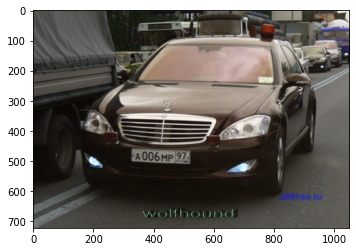

In [ ]:
carro = cv2.imread('carro.png')
plt.imshow(carro)

In [ ]:
def display(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    ax.imshow(img)

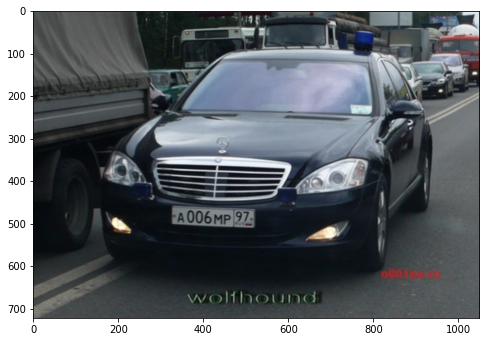

In [ ]:
display(carro)

In [ ]:
russian_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

In [ ]:
def detect_placa(img):

  russian_img = img.copy()

  russian_rects = russian_cascade.detectMultiScale(russian_img, scaleFactor=1.01, minNeighbors=14)

  for (x,y,w,h) in russian_rects:
    cv2.rectangle(russian_img, (x+8,y+5), (x+w-8, y+h-5), (198,55,100), 5) # Offset 8 e 5 para diminuir a area do retangulo, aproximando-o mais da placa
  return russian_img

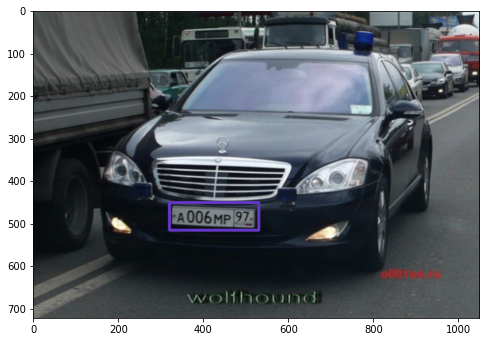

In [ ]:
res_carro = detect_placa(carro)
display(res_carro)

In [ ]:
def detect_placa_blur(img):

  russian_img = img.copy()

  russian_rects = russian_cascade.detectMultiScale(russian_img, scaleFactor=1.1, minNeighbors=10)

  for (x,y,w,h) in russian_rects:

    
    blur = cv2.medianBlur(russian_img[y:y+h,x:x+w] , 25)
    russian_img[y:y+h,x:x+w] = blur
    
  return russian_img

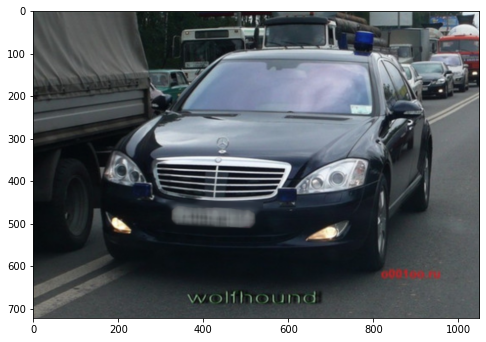

In [ ]:
res_carro_blur = detect_placa_blur(carro)
display(res_carro_blur) 

### 2) Feature Matching

Feature Matching ou correspondência de características é um métdodo extremamente útil em Visão Computacional e utilizado para automatizar o rastreamento de objetos, calibração estéreo, reconstrução 3D, navegação robótica, recuperação de imagens, reconhecimento, entre outras. 

Dentre os algoritmos para descritores, temos o SIFT, SURF, FAST e ORB, que cofificam a informação interessante em uma série de números que agem como uma espécie de "impressão digital" que possibilita diferenciar uma característica de outra, enquanto na correspondência de características em si, temos os algoritmos baseados em força bruta e FLANN.

a) Faça uma cópia da placa.png

b) Faça feature matching entre a placa e a imagem do carro do exercício anterior, experimente combinações de descritores e abordagens para correspondência

c) Quando estiver satisfeito, desenhe e plote os resultados com a função drawMatches( ) do OpenCV

Note que o Feature Matching dará uma visão de como as características Haar funcionam.

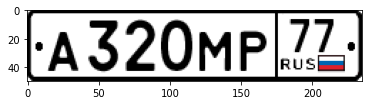

In [ ]:
placa = cv2.imread('placa.png')
placa = cv2.cvtColor(placa,cv2.COLOR_BGR2RGB)
placaGray = cv2.cvtColor(placa,cv2.COLOR_RGB2GRAY)
plt.imshow(placa)

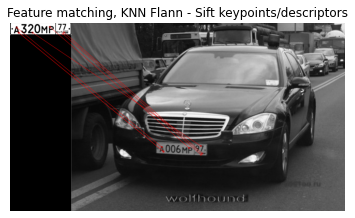

In [ ]:
# SIFT
siftCar = np.copy(carro)
siftCarGray = cv2.cvtColor(siftCar,cv2.COLOR_RGB2GRAY)
placaSift = np.copy(placaGray)
sift = cv2.SIFT_create()
Sift_keypoints1, Sift_descriptors1 = sift.detectAndCompute(placaSift,None)
Sift_keypoints2, Sift_descriptors2 = sift.detectAndCompute(siftCarGray,None)

# Flann based Matcher
# FLANN parameters to find matches.
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(Sift_descriptors1,Sift_descriptors2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

SiftResult = cv2.drawMatchesKnn(placaSift,Sift_keypoints1,siftCarGray,Sift_keypoints2,matches,None,**draw_params)
plt.imshow(SiftResult)
plt.title("Feature matching, KNN Flann - Sift keypoints/descriptors")
plt.axis('off')
print('\n')

In [ ]:
# # SURF
# SurfCar = np.copy(siftCarGray)
# SurfPlaca = np.copy(placaGray)
# surf = cv2.xfeatures2d.SURF_create()

# # Detecting keypoints and computing descriptors
# kpPlaca,desPlaca = surf.detectAndCompute(SurfPlaca)
# kpCar,desCar = surf.detectAndCompute(SurfCar)

# # Brute Force Matcher
# bf = cv2.BFMatcher(crossCheck=true)
# matches = bf.match(desPlaca,desCar)

# SurfImg = cv2.drawMatches(SurfPlaca,kpPlaca,SurfCar,kpCar,matches,None,flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
# plt.imshow(SurfImg)
# plt.title("Feature matching, SURF - Brute Force Matcher")
# plt.axis('off')
# print('\n')

Parece que o SURF esta protegido por licenca, ate utilizando o opencv-contrib 4.4

#### Fazendo Para o FAST:<br>
OBS: Fast, pelo visto, eh um algoritmo que descobre apenas os keypoints, os descritores para esse exercicio serao os mesmos descobertos pelo metodo SIFT.

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 72
Total Keypoints without nonmaxSuppression: 966


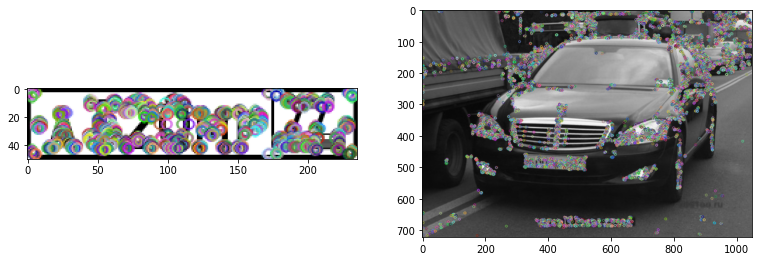

In [ ]:
# FAST Para deteccao de keypoints
fastCar = np.copy(carro)
fastCarGray = cv2.cvtColor(fastCar,cv2.COLOR_RGB2GRAY)
placaFast = np.copy(placaGray)

# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()

# find and draw the keypoints
kp = fast.detect(placaFast,None)
img2 = cv2.drawKeypoints(placaFast, kp, None, color=(255,0,0))

# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )

# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(placaFast, None)
kp1 = fast.detect(fastCarGray, None)

print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
# Mostrando os keypoints descobertos pelo FAST
img3 = cv2.drawKeypoints(placaFast, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img4 = cv2.drawKeypoints(fastCarGray, kp1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(13,10))
ax1.imshow(img3)
ax2.imshow(img4)



Resultado nao satisfaz utilizando essas combinacoes de algoritmos para descoberta dos keypoints, descritores e matches, com argumentos default.

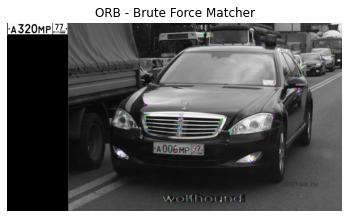

In [ ]:
# ORB
OrbCar = np.copy(carro)
OrbCarGray = cv2.cvtColor(OrbCar,cv2.COLOR_RGB2GRAY)
placaOrb = np.copy(placaGray)

ORB = cv2.ORB_create()
kp1,des1 = ORB.detectAndCompute(placaOrb,None)
kp2,des2 = ORB.detectAndCompute(OrbCarGray,None)

# create BFMatcher object 
# Para essa tentativa, foram utilizadas todas as normas a fim de achar algum resultado satisfatorio. Entretanto, nao achamos.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)

OrbImg = cv2.drawMatches(placaOrb,kp1,OrbCarGray,kp2,matches,None,matchColor=(255,0,0),flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)
plt.imshow(OrbImg)
plt.axis("off")
plt.title("ORB - Brute Force Matcher")
print('\n')

Tambem nao foi satisfatorio, pelo menos com os argumentos utilizados. Dentre os testes, o unico que apresentou resultados satisfatorios foi o SIFT

### 3) Template Matching

Além das técnicas de detecção de cantos, temos também a detecção de padrões em Grid, técnica bem eficiente e utilizada principalmente para a calibração de câmeras, rastreamento de objetos, aplicações em realidade aumentada, entre outras.

a) Crie uma cópia das imagens *ouros_carta.png* e *ouros_template.png*

b) Aplique a técnica de template matching para cada método: cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR, cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF e cv2.TM_SQDIFF_NORMED desenhando retângulos vermelho na detecção.

c) Plote o resultado com os heatmaps do template matching e a detecção com retângulo vermelho.

Bônus: Você consegue desenhar os retângulos para todas as correspondências?


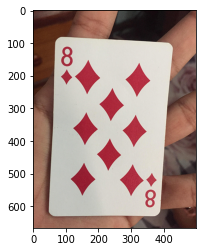

In [ ]:
carta = cv2.imread('ouros_carta.png')
carta = cv2.cvtColor(carta,cv2.COLOR_BGR2RGB)
template = cv2.imread('ouros_template.png')
template = cv2.cvtColor(template,cv2.COLOR_BGR2RGB)
plt.imshow(carta)

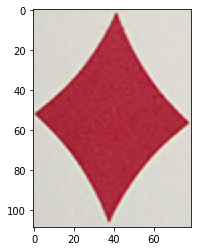

In [ ]:
plt.imshow(template)

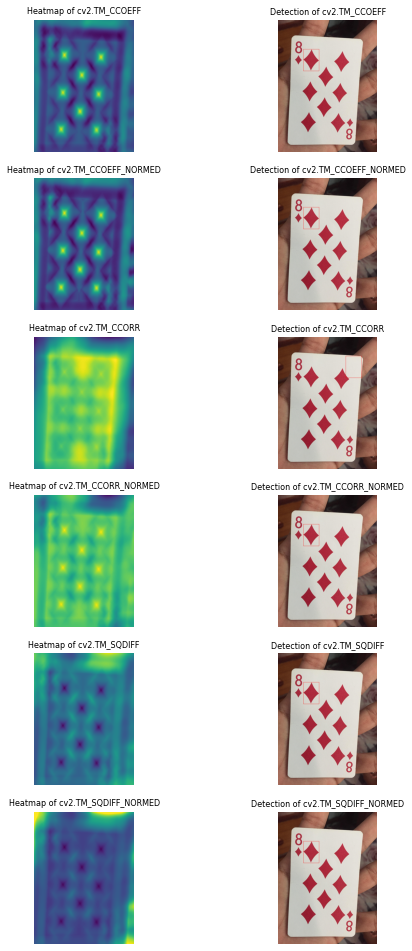

In [ ]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
fig, axes = plt.subplots(nrows=6,ncols=2,figsize=(8,17))

for (method, [ax1,ax2]) in zip(methods,axes):
  cartaCopy = np.copy(carta)

  # Template matching
  res = cv2.matchTemplate(cartaCopy,template,eval(method))
  
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

  if method in ['cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']:
    top_left = min_loc
  else:
    top_left = max_loc

  height, width, channels = template.shape
  bottom_right = (top_left[0]+width,top_left[1]+height)

  cv2.rectangle(cartaCopy,top_left,bottom_right,(255, 0, 0))
  ax1.imshow(res)
  ax1.set_title(f'Heatmap of {method}',fontsize=8)
  ax1.axis('off')
  
  ax2.imshow(cartaCopy)
  ax2.set_title(f'Detection of {method}',fontsize=8)
  ax2.axis('off')

print('\n')

#### BONUS

Para esse bonus, foi utilizado o tutorial do proprio opencv para aprender a utilizar o template matching para multiplos objetos. O codigo a seguir foi altamente inspirado no tutorial que utiliza uma forma de threshold, visto que as tecnicas de template matching retornam uma imagem em escala de cinza onde cada pixel dessa imagem denota o quanto a vizinhanca daquele pixel corresponde ao template.
https://docs.opencv.org/master/d4/dc6/tutorial_py_template_matching.html

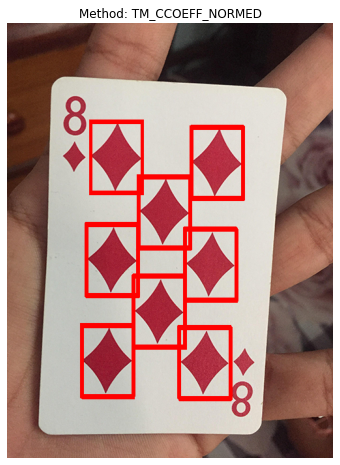

In [ ]:
cartaGray = cv2.cvtColor(carta,cv2.COLOR_RGB2GRAY)
templateGray = cv2.cvtColor(template,cv2.COLOR_RGB2GRAY)
widht, height = templateGray.shape[::-1]

fig, ax = plt.subplots(1,1,figsize=(16,8))

threshold = 0.85

imgCopy = np.copy(carta)

# Template Matching
res = cv2.matchTemplate(cartaGray,templateGray,cv2.TM_CCOEFF_NORMED)
loc = np.where(res >= threshold)
for point in zip(*loc[::-1]):
  cv2.rectangle(imgCopy,point,(point[0] + width, point[1] + height),(255,0,0))

ax.set_title("Method: TM_CCOEFF_NORMED")
ax.axis('off')
ax.imshow(imgCopy)


Resultado ok. Entretanto, podemos notar que o naipe abaixo do numero nao foi reconhecido pelo matchTemplate usando o template atual. Vamos entao reajustar esse template e aplicar novamente esse matchTemplate sobre a imagem que ja temos.

(109, 79, 3)

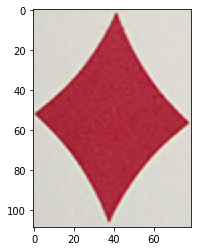

In [ ]:
# Fazendo analise para descobrir as dimensoes do novo template:

plt.imshow(template)
template.shape

(667, 500, 3)

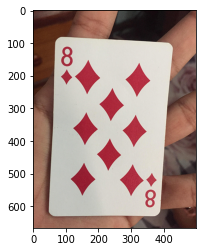

In [ ]:
plt.imshow(carta)
carta.shape

(49, 38, 3)

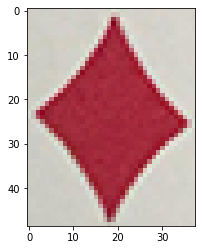

In [ ]:
# Tentativa manual de selecionar o naipe menor (abaixo do numero 8):
plt.imshow(carta[180:229,84:122])
carta[180:229,84:122].shape

Parece Bom! Criando o novo template:

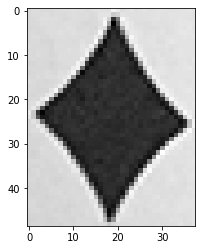

In [ ]:
smaller_template = np.copy(carta[180:229,84:122])
smaller_template = cv2.cvtColor(smaller_template,cv2.COLOR_RGB2GRAY)
plt.imshow(smaller_template,cmap='gray')

Usando o novo template e desenhando sobre a carta com os templates maiores ja marcados:

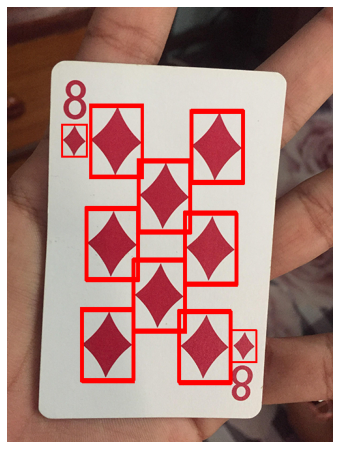

In [ ]:
width, height = smaller_template.shape[::-1]

fig, ax = plt.subplots(1,1,figsize=(16,8))

threshold = 0.85

previouslyMatchedPoints = np.copy(imgCopy)

# Template Matching com o novo template:
res = cv2.matchTemplate(cartaGray,smaller_template,cv2.TM_CCOEFF_NORMED)
loc = np.where(res >= threshold)
for point in zip(*loc[::-1]):
  # Desenhando em cima do que ja temos:
  cv2.rectangle(previouslyMatchedPoints,point,(point[0] + width, point[1] + height),(255,0,0))

ax.axis('off')
ax.imshow(previouslyMatchedPoints)